In [1]:
%load_ext autoreload
# %autoreload 2

In [2]:
import logging
from sys import stdout
from datetime import datetime
import os

logging.basicConfig(
    level=logging.INFO,
    format=f"[%(asctime)s][%(levelname)s][{os.environ.get('USERNAME')}] %(message)s",
    stream=stdout,
    datefmt="%m-%d %H:%M:%S",
)
logging.info(datetime.now())

import numpy as np

[02-12 15:12:08][INFO][pc] 2026-02-12 15:12:08.667414


In [7]:
def gauss_seidel(A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Gauss-Seidel.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]

    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x_new[j] for j in range(i) if j != i]) + sum(
                [A[i, j] * x[j] for j in range(i, n) if j != i]
            )
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new

        x = x_new.copy()
        logging.info(f"i= {k} x: {x.T}")

    return x

In [11]:
def gauss_jacobi(A: np.ndarray, b: np.ndarray, x: np.ndarray, tol: float = 1e-5, max_iter: int = 5) -> np.ndarray:
    """Resuelve el sistema de ecuaciones lineales Ax = b mediante el método de Jacobi.

    ## Parameters
    ``A``: Matriz de coeficientes del sistema de ecuaciones lineales.
    ``b``: Vector de términos independientes del sistema de ecuaciones lineales.
    ``x0``: Vector de aproximación inicial.
    ``tol``: Tolerancia.
    ``max_iter``: Número máximo de iteraciones.

    ## Return
    ``x``: Vector solución del sistema de ecuaciones lineales.
    """
    # --- Validación de los argumentos de la función ---
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)
    assert A.shape[0] == A.shape[1], "La matriz A debe ser de tamaño n-by-(n)."

    if not isinstance(b, np.ndarray):
        logging.debug("Convirtiendo b a numpy array.")
        b = np.array(b, dtype=float)
    assert b.shape[0] == A.shape[0], "El vector b debe ser de tamaño n."

    if not isinstance(x, np.ndarray):
        x = np.array(x, dtype=float, ndmin=2).T
    assert x.shape[0] == A.shape[0], "El vector x0 debe ser de tamaño n."

    # --- Algoritmo ---
    n = A.shape[0]
    logging.info(f"i= {0} x: {x.T}")
    for k in range(1, max_iter + 1):
        x_new = np.zeros((n, 1))  # prealloc
        for i in range(n):
            suma = sum([A[i, j] * x[j] for j in range(n) if j != i])
            x_new[i] = (b[i] - suma) / A[i, i]

        if np.linalg.norm(x_new - x) < tol:
            return x_new
        x = x_new.copy()
    logging.info(f"i= {k} x: {x_new.T}")

    return x

# Ejercicio 1

In [21]:
%autoreload 2
A = [[2,1],[3,2]]
b = [5,8]
x0 = [0,0]
x= gauss_seidel(A, b, x0,1e-6, 10)

print("Gauss seidel\n")
print(x)

x1 = gauss_jacobi(A, b, x0, 100)
print("\nGauss jacobi\n")
print(x1)

[02-12 15:48:15][INFO][pc] i= 0 x: [[0. 0.]]
[02-12 15:48:15][INFO][pc] i= 1 x: [[2.5  0.25]]


[02-12 15:48:15][INFO][pc] i= 2 x: [[2.375  0.4375]]
[02-12 15:48:15][INFO][pc] i= 3 x: [[2.28125  0.578125]]
[02-12 15:48:15][INFO][pc] i= 4 x: [[2.2109375  0.68359375]]
[02-12 15:48:15][INFO][pc] i= 5 x: [[2.15820312 0.76269531]]
[02-12 15:48:15][INFO][pc] i= 6 x: [[2.11865234 0.82202148]]
[02-12 15:48:15][INFO][pc] i= 7 x: [[2.08898926 0.86651611]]
[02-12 15:48:15][INFO][pc] i= 8 x: [[2.06674194 0.89988708]]
[02-12 15:48:15][INFO][pc] i= 9 x: [[2.05005646 0.92491531]]
[02-12 15:48:15][INFO][pc] i= 10 x: [[2.03754234 0.94368649]]
Gauss seidel

[[2.03754234]
 [0.94368649]]
[02-12 15:48:15][INFO][pc] i= 0 x: [[0. 0.]]

Gauss jacobi

[[2.5]
 [4. ]]


# Ejercicio 2

In [30]:
%autoreload 2
A = [[1,1],[-2,1]]
b = [6,0]
x0 = [5,5]
x= gauss_seidel(A, b, x0,1e-6, 100)
x1= gauss_jacobi(A, b, x0, 100)
print("Gauss seidel\n")
print(x)

x1 = gauss_jacobi(A, b, x0, 100)
print("\nGauss jacobi\n")
print(x1)



[02-12 16:01:17][INFO][pc] i= 0 x: [[5. 5.]]
[02-12 16:01:17][INFO][pc] i= 1 x: [[1. 2.]]


[02-12 16:01:17][INFO][pc] i= 2 x: [[4. 8.]]
[02-12 16:01:17][INFO][pc] i= 3 x: [[-2. -4.]]
[02-12 16:01:17][INFO][pc] i= 4 x: [[10. 20.]]
[02-12 16:01:17][INFO][pc] i= 5 x: [[-14. -28.]]
[02-12 16:01:17][INFO][pc] i= 6 x: [[34. 68.]]
[02-12 16:01:17][INFO][pc] i= 7 x: [[ -62. -124.]]
[02-12 16:01:17][INFO][pc] i= 8 x: [[130. 260.]]
[02-12 16:01:17][INFO][pc] i= 9 x: [[-254. -508.]]
[02-12 16:01:17][INFO][pc] i= 10 x: [[ 514. 1028.]]
[02-12 16:01:17][INFO][pc] i= 11 x: [[-1022. -2044.]]
[02-12 16:01:17][INFO][pc] i= 12 x: [[2050. 4100.]]
[02-12 16:01:17][INFO][pc] i= 13 x: [[-4094. -8188.]]
[02-12 16:01:17][INFO][pc] i= 14 x: [[ 8194. 16388.]]
[02-12 16:01:17][INFO][pc] i= 15 x: [[-16382. -32764.]]
[02-12 16:01:17][INFO][pc] i= 16 x: [[32770. 65540.]]
[02-12 16:01:17][INFO][pc] i= 17 x: [[ -65534. -131068.]]
[02-12 16:01:17][INFO][pc] i= 18 x: [[131074. 262148.]]
[02-12 16:01:17][INFO][pc] i= 19 x: [[-262142. -524284.]]
[02-12 16:01:17][INFO][pc] i= 20 x: [[ 524290. 1048580.]]
[02-12 1

# Código para dibujar

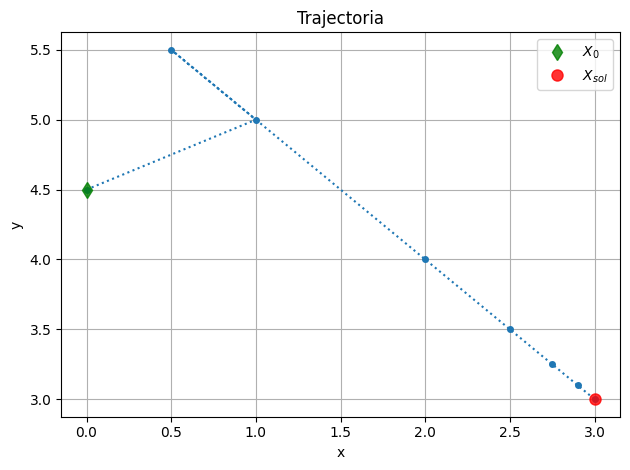

In [ ]:
# Extraer valores de la trayectoria
# -- Datos de ejemplo --
x_values = [0, 1, 0.5, 2, 2.5, 2.75, 2.9, 3.0]
y_values = [4.5, 5, 5.5, 4, 3.5, 3.25, 3.1, 3.0]

import matplotlib.pyplot as plt

iterations = range(len(x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(x_values, y_values, "o:", markersize=4)
plt.plot(x_values[0], y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(x_values[-1], y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

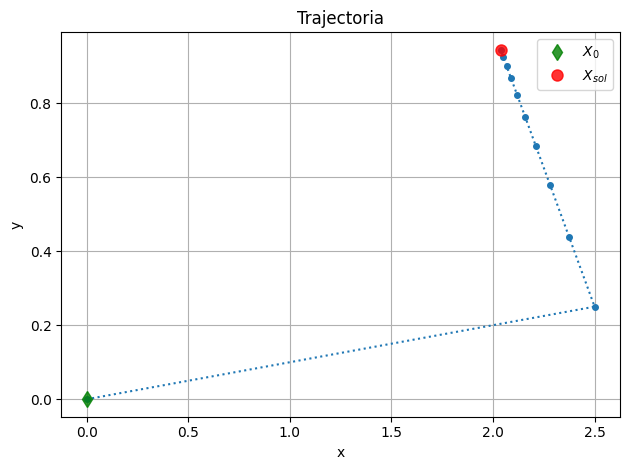

In [24]:
trayectoriasS1=[[0.,0.],
[2.5 ,0.25],
 [2.375 ,0.4375],
 [2.28125 ,0.578125],
 [2.2109375 ,0.68359375],
 [2.15820312,0.76269531],
 [2.11865234,0.82202148],
 [2.08898926,0.86651611],
 [2.06674194,0.89988708],
 [2.05005646,0.92491531],
 [2.03754234,0.94368649]]

s1x_values = [x[0] for x in trayectoriasS1]
s1y_values = [x[1] for x in trayectoriasS1]

import matplotlib.pyplot as plt

iterations = range(len(s1x_values))

# Dibujar trajectoria en el espacio 2D
plt.plot(s1x_values, s1y_values, "o:", markersize=4)
plt.plot(s1x_values[0], s1y_values[0], "gd", markersize=8, label="$X_0$", alpha=0.8)
plt.plot(s1x_values[-1], s1y_values[-1], "ro", markersize=8, label="$X_{sol}$", alpha=0.8)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trajectoria")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()